In [6]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, GRU, LSTM, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/refs/heads/master/tf2.0/sbux.csv")

In [3]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [4]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [5]:
# Start by doing the WRONG thing - trying to predict the price itself
series = df['close'].values.reshape(-1, 1)
series.shape

(1259, 1)

In [7]:
# Normalize the data
# Note: I didn't think about twher the true boundary is, this is just approx
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()
series.shape

(1259,)

In [8]:
series

array([-1.62500489, -1.64174953, -1.6330132 , ...,  2.2342704 ,
        2.36822751,  2.20078112])

In [9]:
# build the dataset
# Let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1249, 10, 1) Y.shape (1249,)


In [10]:
# Try autoregressive RNN model
i = Input(shape=(T,1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss="mse", optimizer=Adam(learning_rate=0.1))

# train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:])
)

Epoch 1/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.7004 - val_loss: 0.3825
Epoch 2/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0245 - val_loss: 0.1344
Epoch 3/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0091 - val_loss: 0.0783
Epoch 4/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0071 - val_loss: 0.0670
Epoch 5/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0064 - val_loss: 0.0622
Epoch 6/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0062 - val_loss: 0.0648
Epoch 7/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057 - val_loss: 0.0553
Epoch 8/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0064 - val_loss: 0.0536
Epoch 9/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0059 - val_loss: 0.0518
Epoch 10/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0056 - val_loss: 0.0506
Epoch 11/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060 - val_loss: 0.0474
Epoch 12/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0054 - va

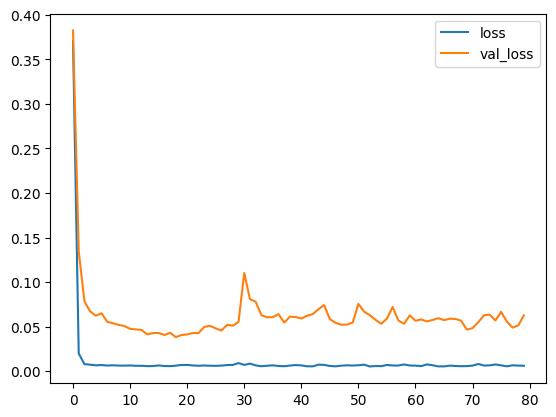

In [11]:
# Plot the loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
(1249, 1)


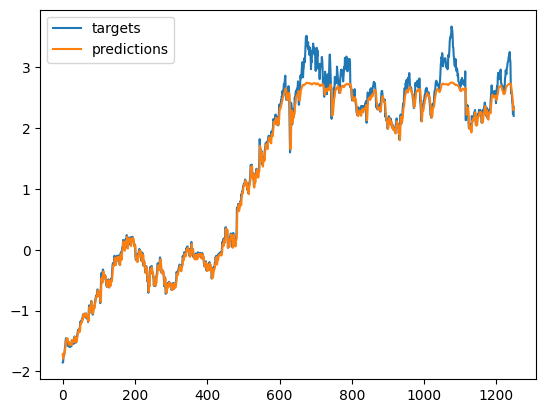

In [13]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

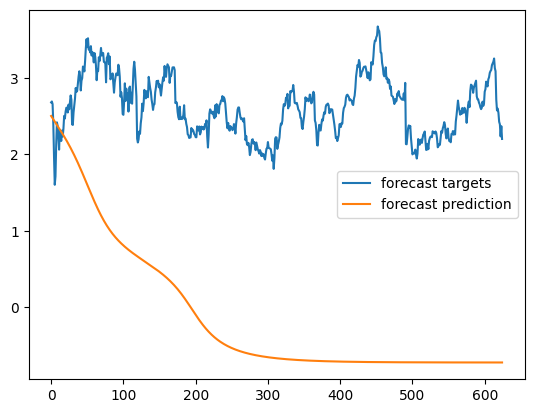

In [15]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(-1, T, 1))[0, 0] # 1x1 array -> scalar

    # update the predictions lsit
    validation_predictions.append(p)

    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

plt.plot(validation_target, label="forecast targets")
plt.plot(validation_predictions, label="forecast prediction")
plt.legend()
plt.show()

In [16]:
# calculate returns by first shifting the data
df['PrevClose'] = df['close'].shift(1) # move everything up 1

# so now it's like
# close / prev close
# x[2]   x[1]
# x[3]   x[2]
# x[4]   x[3]
# ....
# x[t]   x[t-1]

In [17]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [18]:
# then the return is
# (x[t] - x[t-1]) / x[t-1]
df['Return'] = (df['close'] - df['PrevClose']) / df['PrevClose']

In [19]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


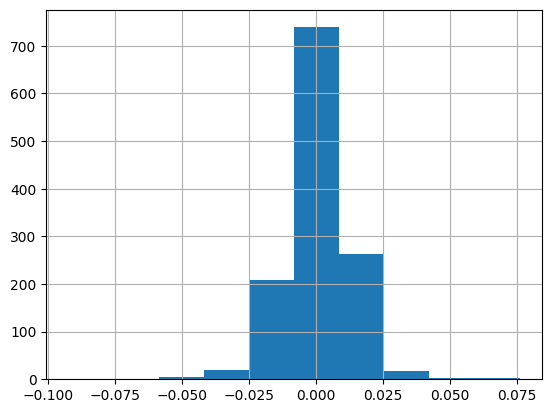

In [21]:
# Now let's try an LSTM to predict
df['Return'].hist();

In [22]:
series = df['Return'].values[1:].reshape(-1, 1)

# Normalize the data
# Note: I didn't think about where the true boundary is, this is just approx.
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()
series.shape

(1258,)

In [23]:
# build the dataset
# Let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1248, 10, 1) Y.shape (1248,)


In [24]:
# Try autoregressive RNN model
i = Input(shape=(T,1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss="mse", optimizer=Adam(learning_rate=0.1))

# train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:])
)

Epoch 1/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 1.0240 - val_loss: 1.1610
Epoch 2/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.9147 - val_loss: 1.1426
Epoch 3/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9544 - val_loss: 1.1739
Epoch 4/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9005 - val_loss: 1.1564
Epoch 5/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0010 - val_loss: 1.1462
Epoch 6/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0133 - val_loss: 1.1662
Epoch 7/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9467 - val_loss: 1.1780
Epoch 8/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0053 - val_loss: 1.1567
Epoch 9/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0400 - val_loss: 1.2131
Epoch 10/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0476 - val_loss: 1.2375
Epoch 11/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0643 - val_loss: 1.1622
Epoch 12/80
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8623 - va

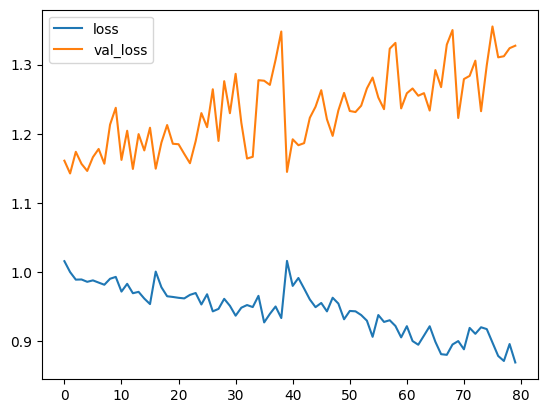

In [25]:
# Plot the loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
(1248, 1)


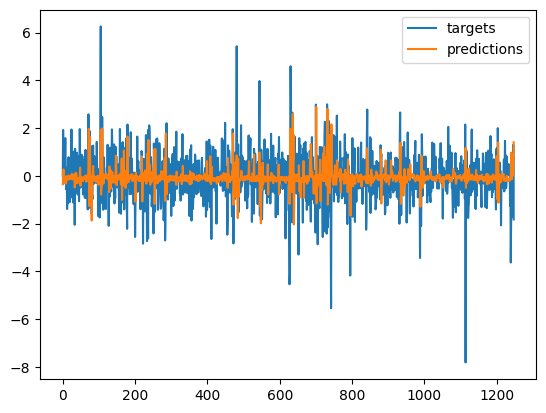

In [26]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━

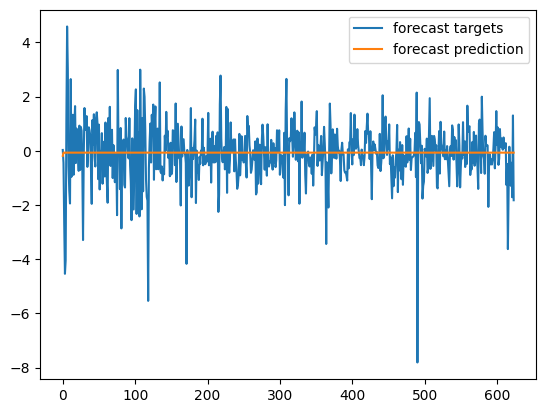

In [27]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(-1, T, 1))[0, 0] # 1x1 array -> scalar

    # update the predictions lsit
    validation_predictions.append(p)

    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

plt.plot(validation_target, label="forecast targets")
plt.plot(validation_predictions, label="forecast prediction")
plt.legend()
plt.show()

In [28]:
# Now turn the full data into numpy arrays

# Not yet in the final "X" format
input_data = df[['open', 'high', 'low', 'close', 'volume']].values
targets = df['Return'].values
input_data.shape, targets.shape

((1259, 5), (1259,))

In [29]:
# Now make the actual data which will go into the neural network
T = 10 # the number of time steps to look at to make a prediction for the next day
D = input_data.shape[1]
N = len(input_data) - T #(e.g if T=10 and you have 11 data points then you'd only have 1)

In [30]:
# normalize the inputs
Ntrain = len(input_data) * 2 // 3
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T])
input_data = scaler.transform(input_data)

In [31]:
# Setup X_train and Y_train
X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros(Ntrain)

for t in range(Ntrain):
    X_train[t, :, :] = input_data[t:t+T]
    Y_train[t] = (targets[t+T] > 0)


In [32]:
# Setup X_test and Y_test
X_test = np.zeros((N - Ntrain, T, D))
Y_test = np.zeros(N - Ntrain)

for u in range(N-Ntrain):
    # u counts from 0...(N-Ntrain)
    # t counts from Ntrain...N
    t = u + Ntrain
    X_test[u, :, :] = input_data[t:t+T]
    Y_test[u] = (targets[t+T] > 0)

In [35]:
# make the RNN
i = Input(shape=(T,D))
x = LSTM(50)(i)
x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)
model.compile(loss="binary_crossentropy",
              optimizer=Adam(learning_rate=0.001),
              metrics=["accuracy"])

# train the RNN
r = model.fit(
    X_train, Y_train,
    batch_size=32,
    epochs=300,
    validation_data=(X_test, Y_test)
)

Epoch 1/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.4664 - loss: 0.6986 - val_accuracy: 0.4854 - val_loss: 0.6985
Epoch 2/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4998 - loss: 0.6935 - val_accuracy: 0.4829 - val_loss: 0.6934
Epoch 3/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5018 - loss: 0.6929 - val_accuracy: 0.4854 - val_loss: 0.6952
Epoch 4/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5234 - loss: 0.6944 - val_accuracy: 0.4854 - val_loss: 0.6934
Epoch 5/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5253 - loss: 0.6917 - val_accuracy: 0.4951 - val_loss: 0.6940
Epoch 6/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5276 - loss: 0.6899 - val_accuracy: 0.4927 - val_loss: 0.6939
Epoch 7/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5414 - loss: 0.6899 - val_accuracy: 0.4902 - val_loss: 0.6927
Epoch 8/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5532 - loss: 0.6887 - val_accuracy: 0.487

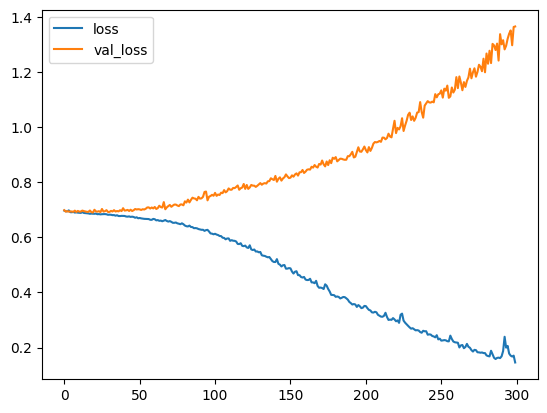

In [36]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

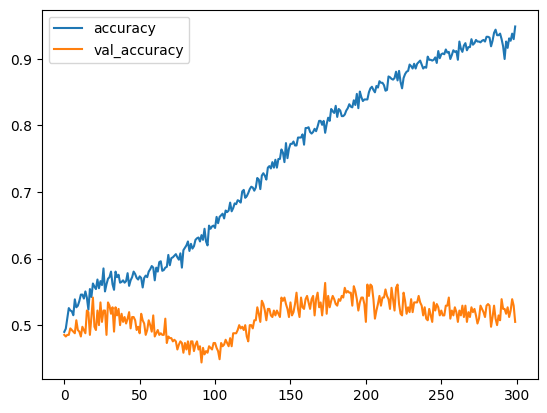

In [37]:
# Plot the accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()